# Hartree Fock Approximation. 

### Structure of notebook

1. Parameters of the cattering region are defined.
2. Parameters of the fermi dirac function & Integration interval are defined.
3. Electron Density is self-consistently calculated
4. The magnetocurrent $\Delta I(m,V) = I(m) = I(-m)$ is calculated.
5. P value is calculated

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Path to modules

In [2]:
import sys

# sys.path.insert(0, '<path_to_modules>')

## Scattering Region

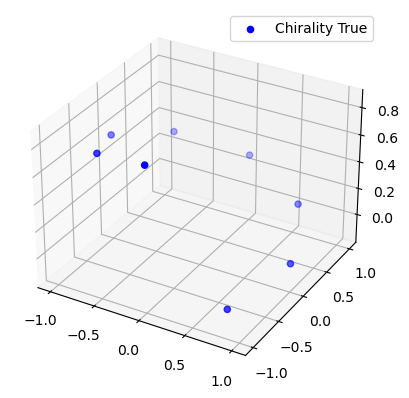

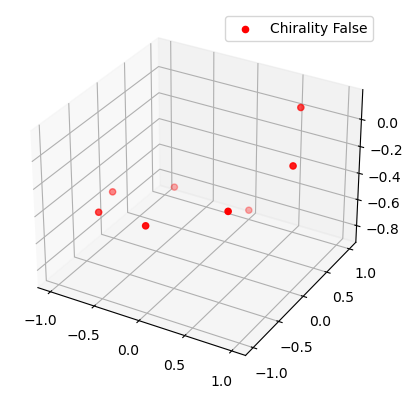

In [3]:
import ChiralChainModel_git
import Geometry_Git
Geometry_Git.plot3d_chain(a=1,c=1,M=1,N=8)

## Functions for electron density

In [4]:
import Integration_Trapz_git

In [5]:
import negf_git


## Define Scattering Region

In [6]:
Lm = 8             #number of sites 
chirality = True   #handedness of molecule 
N = Lm             # Number of sites within one winding
M = 1              # Number of windings
a = 1              # radius of helix
c = 1              # pitch of helix


epsilon = 0 # onsite energy
t = 2.4     # hopping paramter

# List of Spin-Orbit Coupling parameter
lambdalist = [(1*(10**-1))*t,(1*(10**-3))*t]
# List of interaction strength
Ulist = [ 0.5*t, 2*t] 


#Gamma Matrix
kmax  = 4      # Number spin up + down sites coupled to each lead
gamma = 0.5    # coupling strength
pz    = 0.5    # magnetic polarization

pz_P = abs(pz)
pz_M = -abs(pz)


T = 300 # Kelvin Temperature of leads
betaL,betaR = negf_git.func_beta(T), negf_git.func_beta(T) # 1/ElectronVolt




# Bias window

In [7]:
Vmax = 2  # Maximum bias voltage [eV]
dV = 0.25 # stepsize
V_list_total = np.arange(-Vmax,Vmax + dV,dV)

# Energies to integrate over, Fermi Energy

In [8]:
def func_energies(Hamiltonian0,U,npoints):
    '''
    Input:
    Hamiltonian0 = molecule without interaction (U=0)
    U = interaction strength
    npoints = number of energy points in window [emin,emax]
    Output:
    emax = upper bound of intergral
    emin = lowest eigenvalue of Hamiltonian0
    energiesreal = list of energies between [emin-1000,emax] (make sure the emax < ef +Vmax/2)
    eflist = list of fermi energies for which to calculate electron densities.
    '''
    evlist = np.linalg.eigh(Hamiltonian0)[0]
    e_lumo = evlist[int(Hamiltonian0.shape[0]/2)-1]
    e_homo = evlist[int(Hamiltonian0.shape[0]/2)]
    #Fermi Energy
    hl_gap = e_lumo - e_homo
    
    
    
    #lower,upper bound for Glesser function
    emin = np.round(int(10*min(evlist))/10 - 10,2) #lower bound for integrals
    emax = np.round(int(10*max(evlist))/10 + 10,2)   #lower bound for integrals
    
    
    energies_zero4000 = np.linspace(emin-1000,emin,2000) #In wide band the density integrand have very long "tail"
   
    energiesreal_prime = np.linspace(emin,emax,npoints)
    
    energiesreal = Integration_Trapz_git.jointwolist(energies_zero4000,energiesreal_prime)

#     eflist = [U/2 + abs(np.round( 0  + kappa*hl_gap/2,11)) for kappa in [0.25] ]
    
    #IMPORTANT: Note that ef = 0 is the "symmetric fermi energy", 
    #           since we shifted U<n> -> U(<n>-1/2) in the module:  "negf_git", function: "Hamiltonian_HF".
    eflist = [ 0  ] 
    
    return emin,emax,npoints,energiesreal,eflist

# Self-Consistent criteria & Integration

Comment on the convergence: Hartree Fock converges well for small U i.e. U<t.

In [9]:
tol = 10**-5
max_iteration = 100

npoints= 8000

#### Set Paramters

In [10]:
U = Ulist[0]
lambda1 = lambdalist[0]

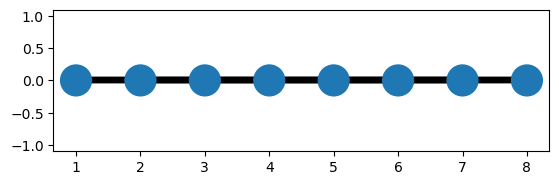

0.5 0.1 0
--- V = -2.0 ---
[0.03619 0.05587 0.02063 0.00064 0.00978 0.05449 0.02967 0.01681 0.00032
 0.03606 0.03863 0.03537 0.0071  0.01928 0.02406 0.0603 ]
[0.01464 0.00897 0.00396 0.00075 0.01347 0.00293 0.0014  0.00529 0.00636
 0.00164 0.00951 0.00804 0.001   0.00342 0.01635 0.00576]
[0.00232 0.00371 0.00026 0.00144 0.00106 0.00293 0.00102 0.00016 0.0003
 0.00098 0.00189 0.00244 0.00085 0.00102 0.00176 0.00396]
[1.00e-03 5.90e-04 3.80e-04 1.30e-04 8.10e-04 2.70e-04 4.00e-05 2.10e-04
 2.50e-04 8.00e-05 6.70e-04 4.40e-04 3.00e-04 2.30e-04 1.11e-03 4.30e-04]
[1.6e-04 2.6e-04 4.0e-05 1.0e-04 9.0e-05 1.9e-04 4.0e-05 1.0e-05 1.0e-05
 5.0e-05 1.1e-04 1.7e-04 5.0e-05 9.0e-05 1.3e-04 2.7e-04]
[7.e-05 4.e-05 3.e-05 1.e-05 5.e-05 2.e-05 0.e+00 1.e-05 1.e-05 0.e+00
 5.e-05 3.e-05 2.e-05 1.e-05 8.e-05 3.e-05]
[1.e-05 2.e-05 0.e+00 1.e-05 1.e-05 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00
 1.e-05 1.e-05 0.e+00 1.e-05 1.e-05 2.e-05]
[0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0

[3.e-05 5.e-05 2.e-05 2.e-05 3.e-05 4.e-05 2.e-05 4.e-05 2.e-05 4.e-05
 3.e-05 4.e-05 1.e-05 2.e-05 3.e-05 5.e-05]
[1.e-05 1.e-05 1.e-05 0.e+00 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1.e-05 1.e-05 0.e+00 2.e-05 1.e-05]
[0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0.25 ---
[0.00097 0.00082 0.00247 0.00084 0.00161 0.00174 0.0025  0.00084 0.00161
 0.00173 0.0025  0.00084 0.00161 0.00172 0.00063 0.0009 ]
[0.00028 0.0003  0.00018 0.00022 0.00034 0.00054 0.00029 0.00044 0.00028
 0.00046 0.00033 0.00054 0.00014 0.00026 0.00014 0.0004 ]
[1.2e-04 1.1e-04 6.0e-05 5.0e-05 1.5e-04 1.0e-04 1.2e-04 8.0e-05 1.2e-04
 7.0e-05 1.5e-04 9.0e-05 7.0e-05 3.0e-05 1.5e-04 8.0e-05]
[3.e-05 5.e-05 2.e-05 2.e-05 3.e-05 4.e-05 2.e-05 4.e-05 2.e-05 4.e-05
 3.e-05 4.e-05 1.e-05 2.e-05 3.e-05 5.e-05]
[1.e-05 1.e-05 1.e-05 0.e+00 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1

[0.00376 0.00241 0.00145 0.00029 0.00292 0.00104 0.00016 0.00101 0.00098
 0.0003  0.00244 0.00187 0.00103 0.00088 0.004   0.00185]
[6.10e-04 1.01e-03 1.40e-04 3.70e-04 2.80e-04 8.10e-04 2.10e-04 4.00e-05
 8.00e-05 2.60e-04 4.40e-04 6.80e-04 2.40e-04 3.00e-04 4.50e-04 1.11e-03]
[2.6e-04 1.6e-04 1.0e-04 4.0e-05 1.9e-04 9.0e-05 2.0e-05 5.0e-05 5.0e-05
 1.0e-05 1.8e-04 1.1e-04 9.0e-05 5.0e-05 2.7e-04 1.3e-04]
[4.e-05 7.e-05 1.e-05 3.e-05 2.e-05 5.e-05 1.e-05 0.e+00 0.e+00 1.e-05
 3.e-05 5.e-05 2.e-05 2.e-05 3.e-05 8.e-05]
[2.e-05 1.e-05 1.e-05 0.e+00 1.e-05 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00
 1.e-05 1.e-05 1.e-05 0.e+00 2.e-05 1.e-05]
[0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = -1.75 ---
[0.00074 0.00313 0.00134 0.00255 0.00215 0.00014 0.00313 0.00428 0.00333
 0.00128 0.00266 0.00421 0.00232 0.00037 0.0014  0.0033 ]
[0.00152 0.00014 0.0003  0.00024 0.00062 0.0004

[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0.25 ---
[0.00085 0.00105 0.00087 0.0024  0.00171 0.00168 0.00087 0.00242 0.00171
 0.00169 0.00086 0.00242 0.00169 0.00168 0.00092 0.00071]
[0.00028 0.00029 0.0002  0.00018 0.00054 0.00034 0.00043 0.00029 0.00047
 0.00028 0.00054 0.00033 0.00028 0.00013 0.00042 0.00014]
[1.1e-04 1.2e-04 5.0e-05 6.0e-05 1.0e-04 1.5e-04 8.0e-05 1.2e-04 7.0e-05
 1.3e-04 9.0e-05 1.5e-04 3.0e-05 7.0e-05 7.0e-05 1.6e-04]
[5.e-05 3.e-05 2.e-05 2.e-05 4.e-05 3.e-05 4.e-05 2.e-05 4.e-05 2.e-05
 4.e-05 3.e-05 2.e-05 1.e-05 5.e-05 3.e-05]
[1.e-05 1.e-05 0.e+00 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1.e-05 0.e+00 1.e-05 1.e-05 2.e-05]
[0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0.5 ---
[0.00094 0.001

In [11]:

GammaR,GammaLP,GammaLM,Hamiltonian0,hamiltonian_shape= ChiralChainModel_git.system_hamiltonian0(Lm,
                                                                                epsilon,t, 
                                                                          lambda1,chirality,
                                                                          a,c,M,N,
                                                                            kmax,gamma,abs(pz)
                                                                        )
emin,emax,npoints,energiesreal,eflist = func_energies(Hamiltonian0,U,npoints)


for i in range(len(eflist)):
    ef = eflist[i]

    print(U/t, lambda1/t,ef)



    nP_list_total, convglistP = Integration_Trapz_git.self_consistent_trapz(V_list_total,Vmax,
                                                                          max_iteration,ef,
                                                                        U,
                                                                        Hamiltonian0,
                                                                        GammaLP,GammaR, 
                                                                        betaL, betaR,tol,energiesreal)



    nM_list_total, convglistM = Integration_Trapz_git.self_consistent_trapz(V_list_total,Vmax,
                                                                          max_iteration,
                                                                            ef,
                                                                        U,
                                                                        Hamiltonian0,
                                                                        GammaLM,GammaR, 
                                                                        betaL, betaR,tol,energiesreal)



    V_list_convg,nP_list_conv,nM_list_conv    = Integration_Trapz_git.converged_lists(V_list_total,
                                                                              nP_list_total , convglistP,
                                                                                  nM_list_total, convglistM)

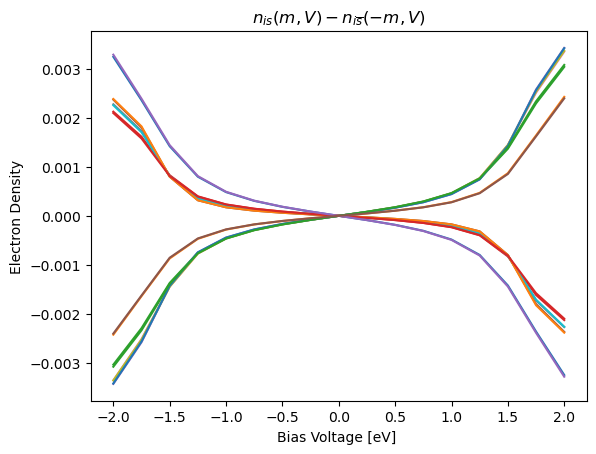

In [22]:

plt.title('$n_{is}(m,V) - n_{i\overline{s}}(-m,V)$')
n_list_total_convgM_swap = [negf_git.pairwise_swap(nM_list_conv[i]) for i in range(len(nM_list_conv))]

plt.plot(V_list_convg,np.subtract(nP_list_conv,n_list_total_convgM_swap))
plt.xlabel('Bias Voltage [eV] ')
plt.ylabel('Electron Density')
plt.show()

# Currents 

In [14]:
import Currents_HF_git as Current_method

# Magnetocurrent $\Delta I(m,V)$ 

In [15]:
for i in range(len(eflist)):
    ef = eflist[i]

    print(U/t, lambda1/t,ef)
    dI_list_quad,dI_list_err_quad = Current_method.calc_dI_quad(
                                                V_list_convg,ef,
                                              Hamiltonian0 ,
                                              GammaLP,GammaR,
                                              GammaLM,
                                              U,nP_list_conv, nM_list_conv,
                                              betaL,betaR)







0.5 0.1 0
 --- V = -2.0 ---
 --- V = -1.75 ---
 --- V = -1.5 ---
 --- V = -1.25 ---
 --- V = -1.0 ---
 --- V = -0.75 ---
 --- V = -0.5 ---
 --- V = -0.25 ---
 --- V = 0.0 ---
 --- V = 0.25 ---
 --- V = 0.5 ---
 --- V = 0.75 ---
 --- V = 1.0 ---
 --- V = 1.25 ---
 --- V = 1.5 ---
 --- V = 1.75 ---
 --- V = 2.0 ---


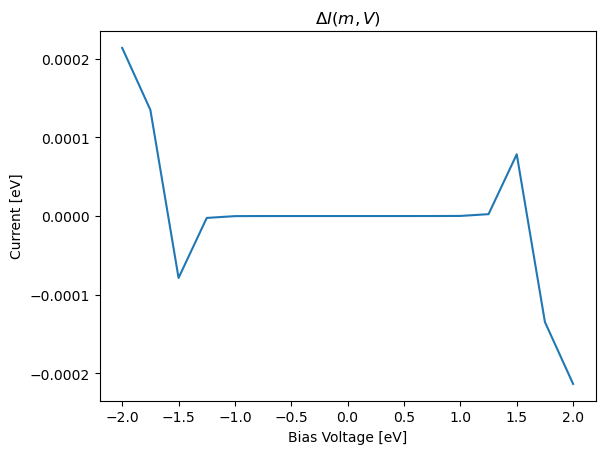

In [16]:
plt.title('$\Delta I(m,V)$')
plt.plot(V_list_convg,dI_list_quad)
plt.xlabel('Bias Voltage [eV]')
plt.ylabel('Current [eV]')
plt.show()

# 5. P Value

In [17]:
import Pvalue

In [18]:
Vlist_prime,PJ_list = Pvalue.function_PvaluedI(V_list_convg,dI_list_quad,12)

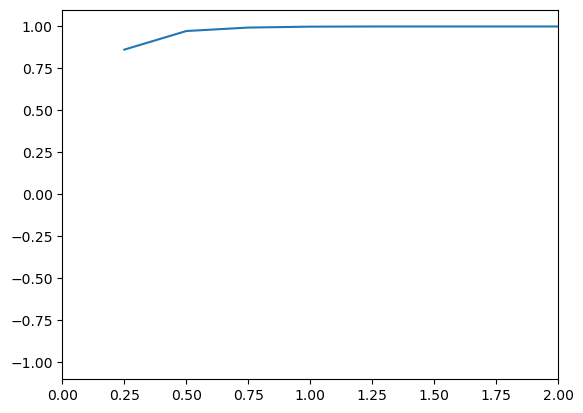

In [19]:
plt.plot(Vlist_prime,PJ_list)
plt.xlim(0,Vmax)
plt.ylim(-1-0.1,1+0.1)
plt.show()